<a href="https://colab.research.google.com/github/habib4445/Python/blob/main/diabetes_eda_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  *****Loading Data*****

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# **Data Overview**

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.describe(include="O")

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [8]:
df.shape

(100000, 9)

In [9]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [10]:
df.duplicated().sum()

np.int64(3854)

In [11]:
df.drop_duplicates(inplace=True)

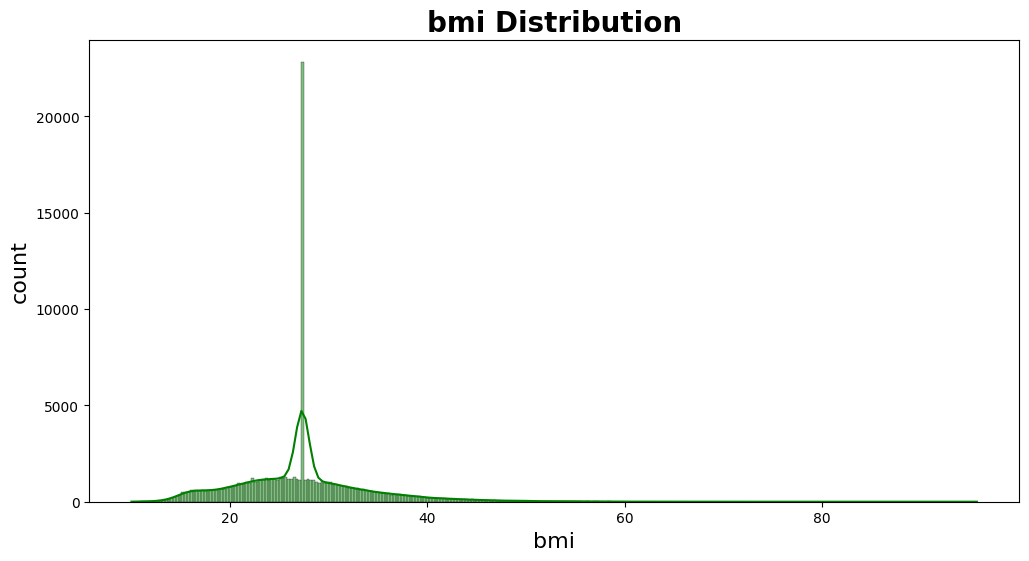

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['bmi'],kde=True,color="green")
plt.title('bmi Distribution',fontsize=20,fontweight='bold')
plt.xlabel('bmi',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.show()

In [13]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['bmi']=df['bmi'].clip(lower_bound,upper_bound)

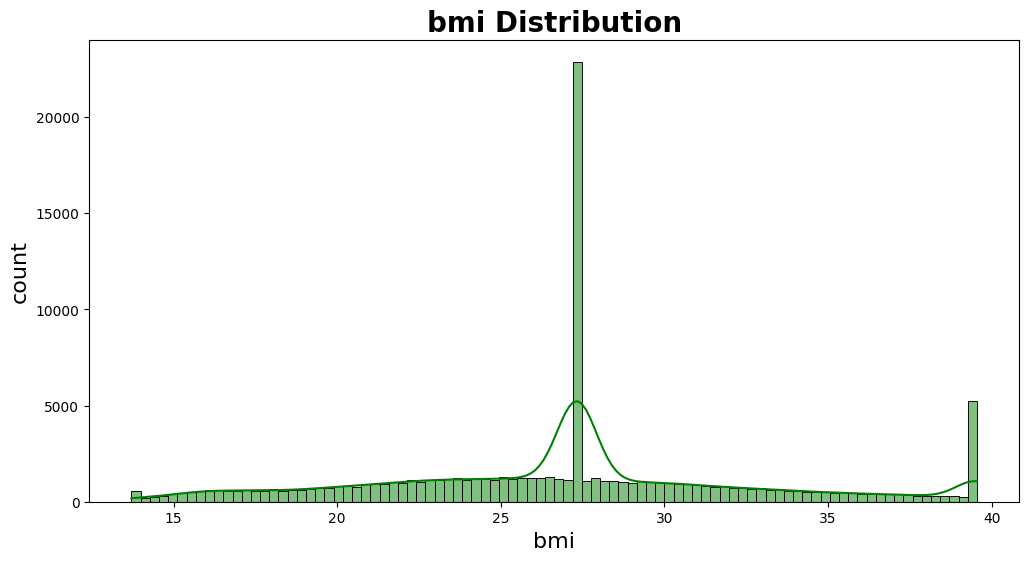

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['bmi'],kde=True,color="green")
plt.title('bmi Distribution',fontsize=20,fontweight='bold')
plt.xlabel('bmi',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.show()

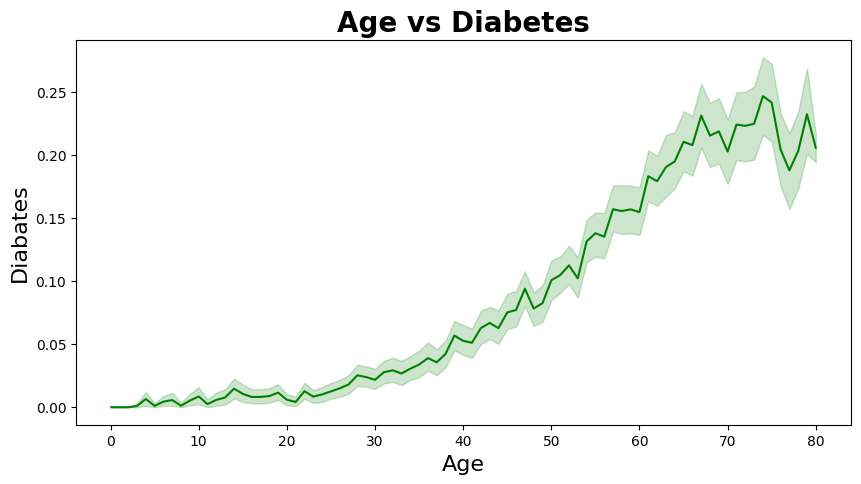

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['age'],y=df['diabetes'],color='green')
plt.title('Age vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('Age',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

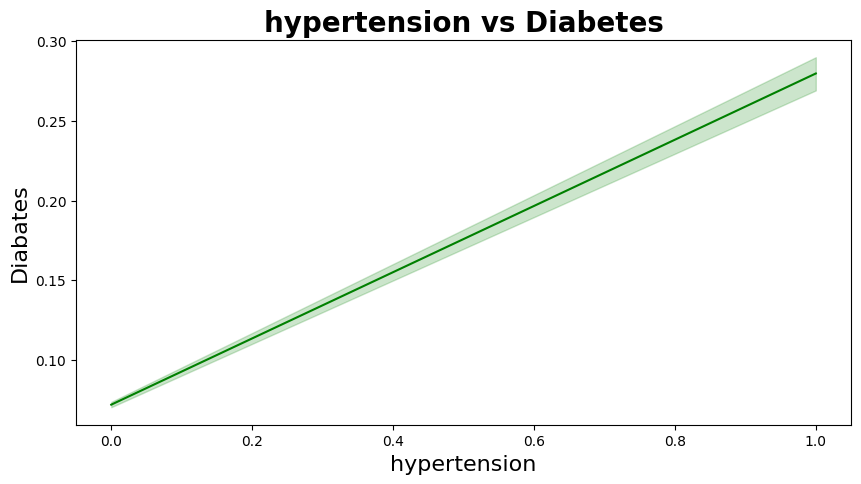

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['hypertension'],y=df['diabetes'],color='green')
plt.title('hypertension vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('hypertension',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

# ***Convert Columns Into Numeric***

In [17]:
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])

In [18]:
df["gender"]

,gender
0,0
1,0
2,1
3,0
4,1
...,...
99994,0
99996,0
99997,1
99998,0


In [19]:
le = LabelEncoder()
df['smoking_history']= le.fit_transform(df['smoking_history'])

In [20]:
df["smoking_history"]

,smoking_history
0,4
1,0
2,4
3,1
4,1
...,...
99994,0
99996,0
99997,3
99998,4


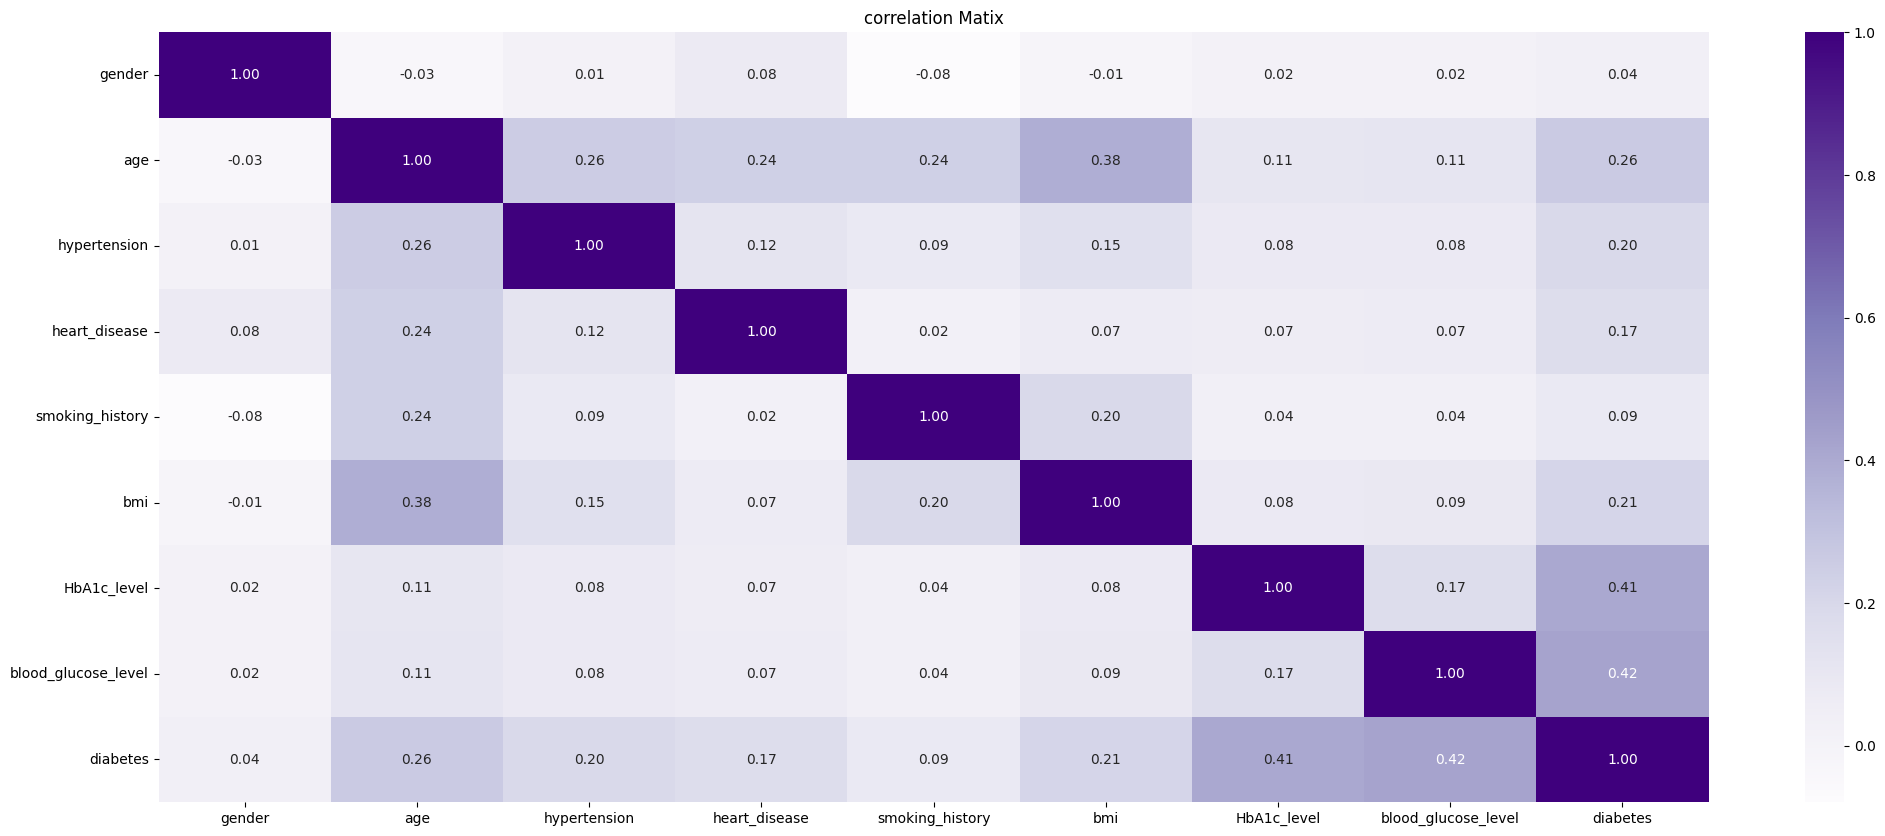

In [21]:
plt.figure(figsize=(25, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Purples', fmt=".2f")
plt.title("correlation Matix")
plt.show()

# ***Scalling***

In [22]:
numerical_cols = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']

In [23]:
scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# ***Split Data***

In [24]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

# ***Logistic Regression Model***

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# ***Accuracy***

In [27]:
y_pred = model.predict(x_test)

print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9573062922516901


In [28]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9593062561755682
0.9573062922516901


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.86      0.62      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



# ***Confusion Matrix***

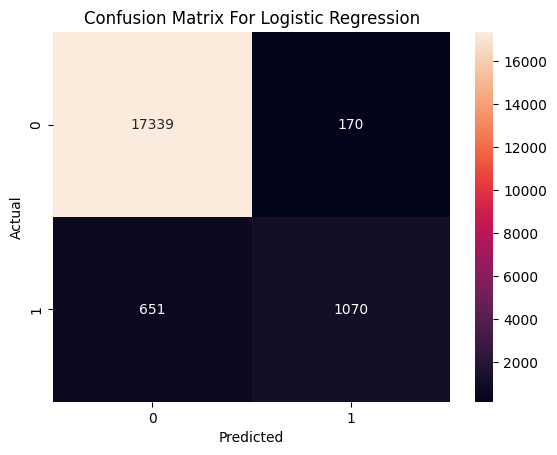

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True, fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

# ***Saving Model***

In [31]:
import pickle

pickle.dump(model,open("Logistic_Model.pkl","wb"))

# ***Svc Model***

In [32]:
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [33]:
y_pred_svc=svc_model.predict(x_test)
print(accuracy_score(y_pred_svc, y_test))

0.9583463338533541


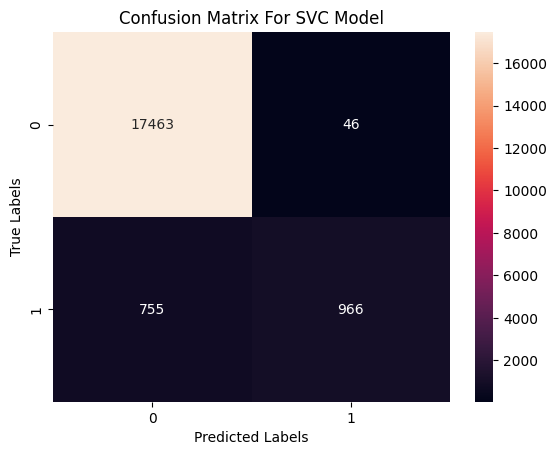

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For SVC Model')
plt.show()

In [35]:
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     18218
           1       0.56      0.95      0.71      1012

    accuracy                           0.96     19230
   macro avg       0.78      0.96      0.84     19230
weighted avg       0.97      0.96      0.96     19230



# ***KNN Model***

In [36]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
y_pred = KNN.predict(x_test)

print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9571502860114405


In [38]:
print(KNN.score(x_train,y_train))
print(KNN.score(x_test,y_test))

0.9617374798481461
0.9571502860114405


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.96      0.54      0.69      1721

    accuracy                           0.96     19230
   macro avg       0.96      0.77      0.84     19230
weighted avg       0.96      0.96      0.95     19230



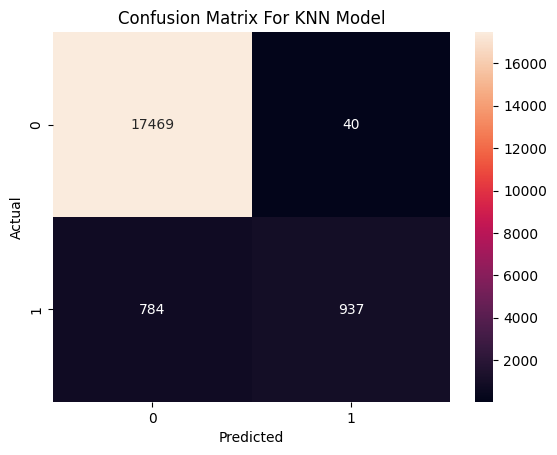

In [40]:
sns.heatmap( confusion_matrix(y_test,y_pred) , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For KNN Model')
plt.show()

In [41]:
import pickle

pickle.dump(KNN,open("KNN_Model.pkl","wb"))

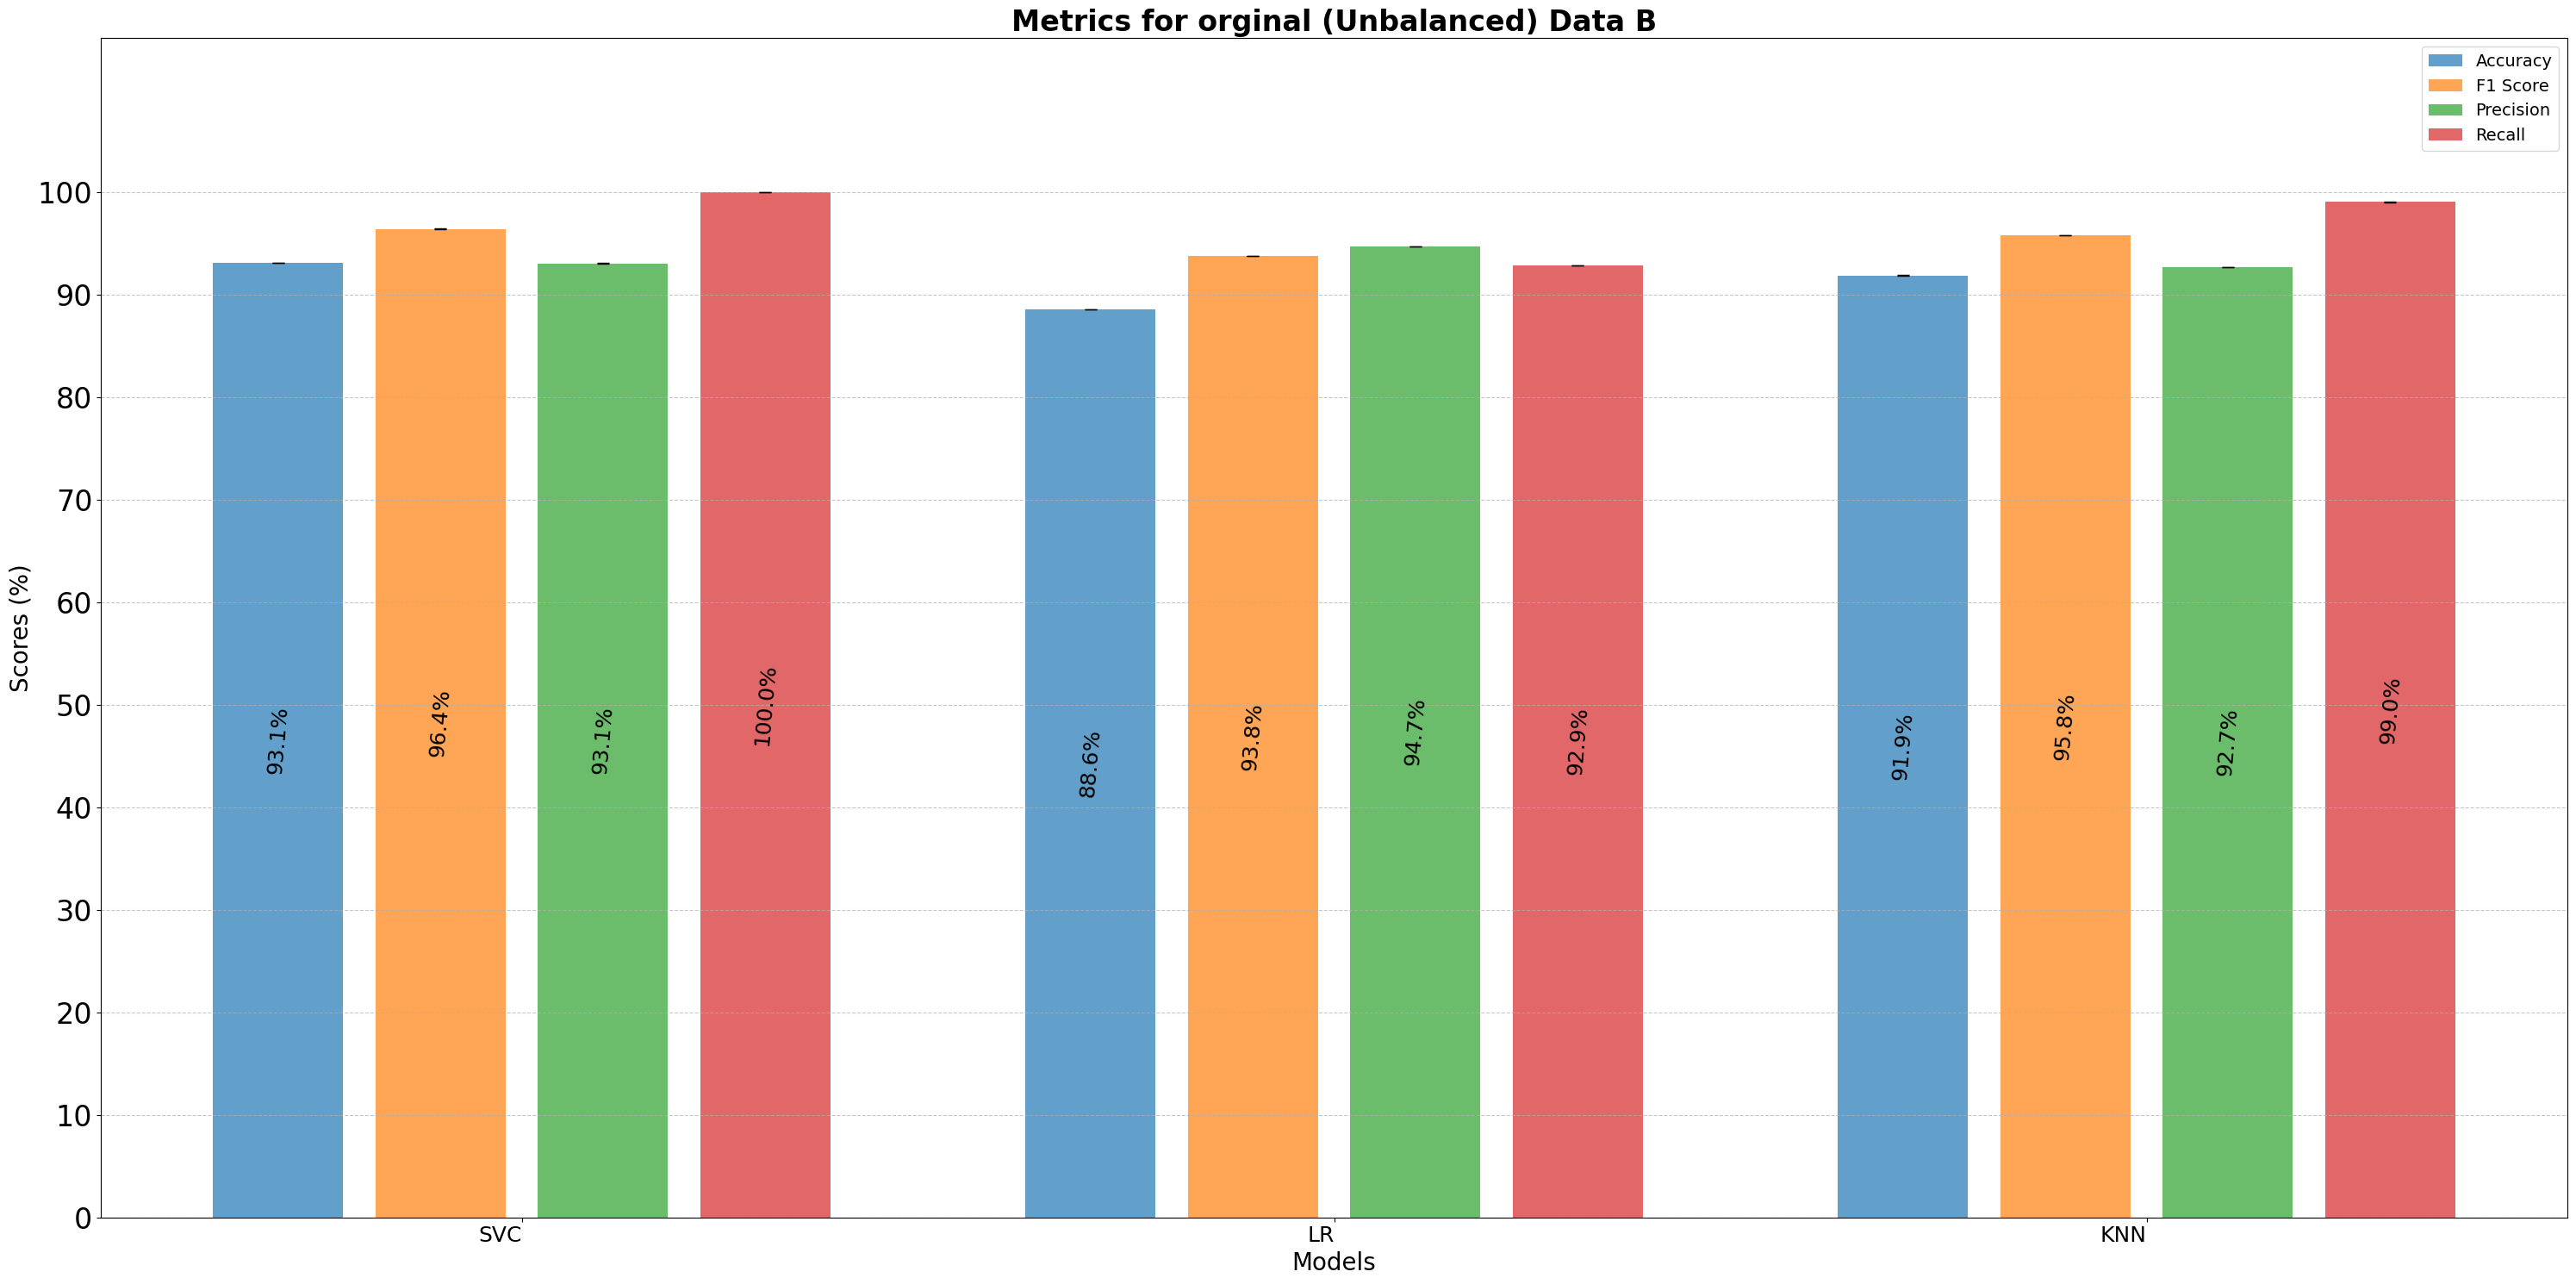

In [42]:
# Model names and their corresponding metrics
models = ['SVC','LR','KNN',]

# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
    0.9307228915662651, 0.8855421686746988, 0.9186746987951807,
]]
precision = [100 * x for x in [
    0.9305135951661632, 0.9470198675496688, 0.9270516717325228,
]]
recall = [100 * x for x in [
    1.0, 0.9285714285714286, 0.9902597402597403,
]]
f1_score = [100 * x for x in [
    0.9640062597809077, 0.9377049180327869, 0.957613814756672,
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02, ]
error_precisions = [0.01, 0.02, 0.01, ]
error_recalls = [0.01, 0.01, 0.02, ]
error_f1_scores = [0.02, 0.03, 0.02, ]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data B', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data B.pdf', bbox_inches='tight')
plt.show()